#Importing libraries and cleaned_df_Eg dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cbm_vbm_new.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Cs,FA,MA,Pb,Sn,I,Br,BG,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.564,-3.9,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.709,-3.6,-5.40


#Heatmap

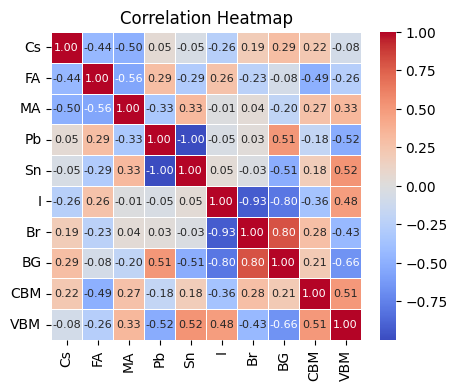

In [ ]:
df1=df.iloc[:,0:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

#Data Prep

In [ ]:
dfx=df.iloc[:,:-2]
X=dfx.values
y=df.iloc[:,-2].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br,BG
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.564
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.709
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,2.328
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.255
...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.285
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.307
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.419


#Ensemble Learning

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.1681
Standard Deviation: 0.0263


In [ ]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.7178942409850644
R value: 0.8529473368792523
MAE on Test Set: 0.09104543417366934
MSE on Test Set: 0.01396921340816311
RMSE on Test Set: 0.11819142696559302


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.8557161879044454
R value: 0.9305261610856731
MAE on Train Set: 0.06444293255131928
MSE on Train Set: 0.007801585368067893
RMSE on Train Set: 0.08832658358652785


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[-3.74 -3.55]
 [-3.76 -3.9 ]
 [-3.81 -3.73]
 [-4.03 -4.  ]
 [-3.95 -4.04]
 [-3.9  -3.8 ]
 [-3.38 -3.36]
 [-3.49 -3.42]
 [-3.72 -3.85]
 [-3.96 -3.9 ]
 [-3.86 -3.85]
 [-3.84 -3.83]
 [-3.88 -4.2 ]
 [-3.99 -3.9 ]
 [-3.96 -3.95]
 [-3.98 -4.07]
 [-3.97 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

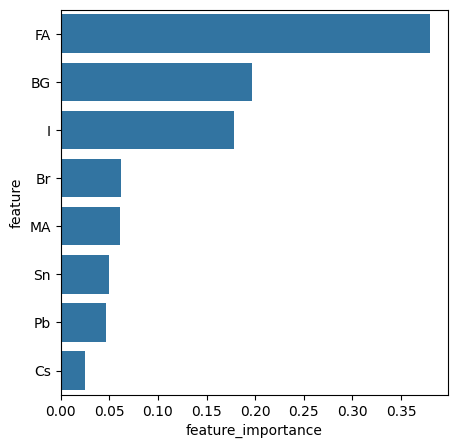

In [ ]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

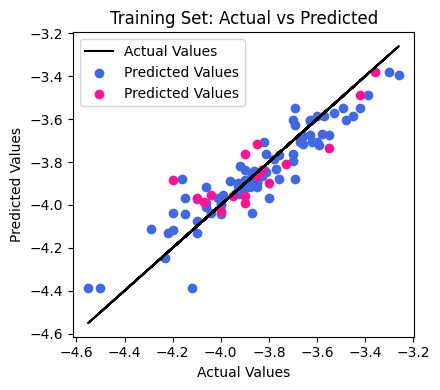

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Predicted Values')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1666
Standard Deviation: 0.0394


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value2)
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R value: 0.9010929392318019
MSE on Test Set: 0.010725502437199452
RMSE on Test Set: 0.1035640016472879


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p2)
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R value: 0.9415032054466944
MSE on Train Set: 0.006256103211132977
RMSE on Train Set: 0.07909553218186838


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[-3.56 -3.55]
 [-3.74 -3.9 ]
 [-3.69 -3.73]
 [-4.03 -4.  ]
 [-3.94 -4.04]
 [-3.87 -3.8 ]
 [-3.31 -3.36]
 [-3.4  -3.42]
 [-3.76 -3.85]
 [-3.91 -3.9 ]
 [-3.86 -3.85]
 [-3.87 -3.83]
 [-3.89 -4.2 ]
 [-4.02 -3.9 ]
 [-3.94 -3.95]
 [-4.05 -4.07]
 [-3.99 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

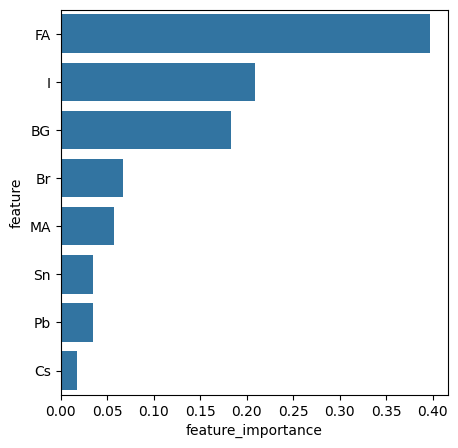

In [ ]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

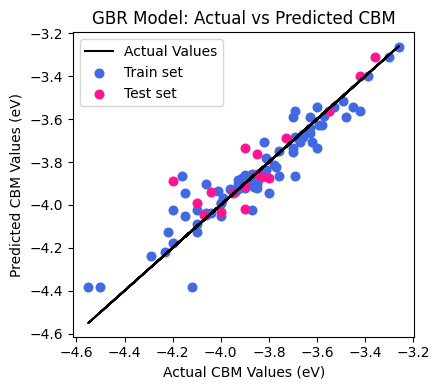

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted CBM')
plt.savefig('GBR Model: Actual vs Predicted CBM.png')

plt.tight_layout()
plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.1857
Standard Deviation: 0.0541


In [ ]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.6216289335808489
R value: 0.8285126558782874
MAE on Test Set: 0.09687409849727859
RMSE on Test Set: 0.1368796731593636


In [ ]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9011214516738185
R value: 0.9492758386697373
MAE on Train Set: 0.03693994788713353
MSE on Train Set: 0.005346472515755624
RMSE on Train Set: 0.07311957682970836


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[-3.57 -3.55]
 [-3.7  -3.9 ]
 [-3.79 -3.73]
 [-4.05 -4.  ]
 [-3.99 -4.04]
 [-3.81 -3.8 ]
 [-3.3  -3.36]
 [-3.39 -3.42]
 [-3.58 -3.85]
 [-4.09 -3.9 ]
 [-3.85 -3.85]
 [-3.9  -3.83]
 [-3.86 -4.2 ]
 [-3.95 -3.9 ]
 [-3.93 -3.95]
 [-4.01 -4.07]
 [-3.92 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

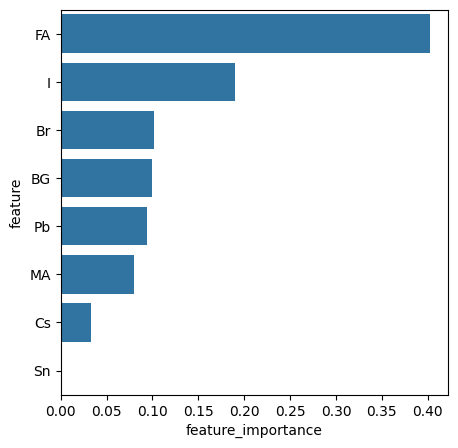

In [ ]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

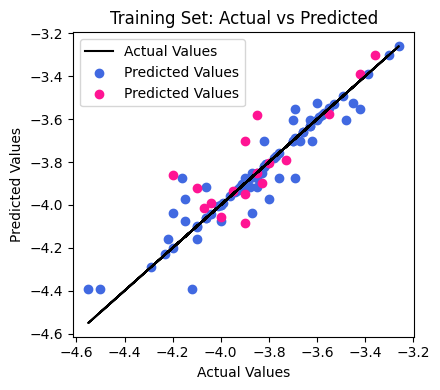

In [ ]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Predicted Values')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.2173796	total: 4.24ms	remaining: 602ms
7:	learn: 0.2158060	total: 4.8ms	remaining: 596ms
8:	learn: 0.2143115	total: 5.36ms	remaining: 591ms
9:	learn: 0.2129782	total: 5.94ms	remaining: 588ms
10:	learn: 0.2116214	total: 6.42ms	remaining: 577ms
11:	learn: 0.2100326	total: 6.98ms	remaining: 575ms
12:	learn: 0.2084793	total: 7.57ms	remaining: 575ms
13:	learn: 0.2068758	total: 8.13ms	remaining: 573ms
14:	learn: 0.2051963	total: 8.61ms	remaining: 565ms
15:	learn: 0.2039842	total: 9.05ms	remaining: 556ms
16:	learn: 0.2026867	total: 9.61ms	remaining: 556ms
17:	learn: 0.2014205	total: 10.2ms	remaining: 557ms
18:	learn: 0.2001919	total: 10.8ms	remaining: 557ms
19:	learn: 0.1985265	total: 11.3ms	remaining: 555ms
20:	learn: 0.1972300	total: 11.9ms	remaining: 556ms
21:	learn: 0.1961308	total: 12.5ms	remaining: 556ms
22:	learn: 0.1946811	total: 13.1ms	remaining: 555ms
23:	learn: 0.1937074	total: 13.8ms	remaining: 562ms
24:	learn: 0.19225

In [ ]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.7040117123182492
R value: 0.8498736968873796
MAE on Test Set: 0.091703869145683
MSE on Test Set: 0.014656643562970462
RMSE on Test Set: 0.12106462556407822


In [ ]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.8956821536568674
R value: 0.9467679424611685
MAE on Train Set: 0.04579895571887521
MSE on Train Set: 0.005640581378040897
RMSE on Train Set: 0.07510380401844434


In [ ]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[-3.65 -3.55]
 [-3.72 -3.9 ]
 [-3.84 -3.73]
 [-4.04 -4.  ]
 [-3.96 -4.04]
 [-3.88 -3.8 ]
 [-3.31 -3.36]
 [-3.4  -3.42]
 [-3.68 -3.85]
 [-3.94 -3.9 ]
 [-3.85 -3.85]
 [-3.88 -3.83]
 [-3.88 -4.2 ]
 [-4.01 -3.9 ]
 [-3.99 -3.95]
 [-4.07 -4.07]
 [-3.95 -4.1 ]]


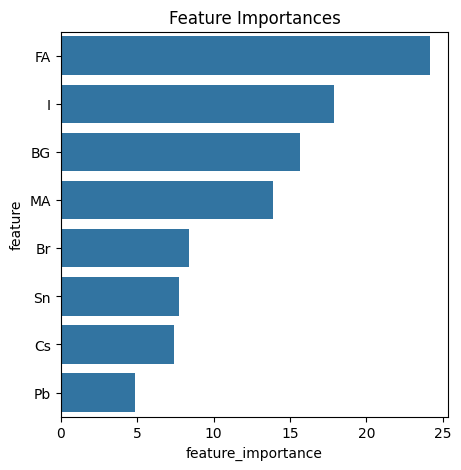

In [ ]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(5, 5))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Feature Importances')
plt.show()


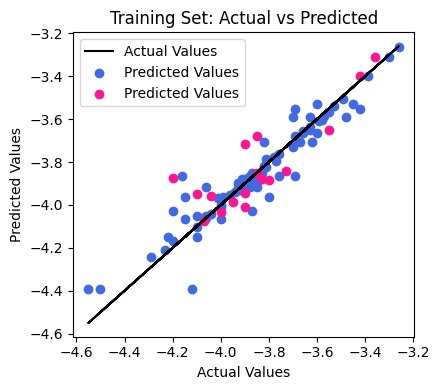

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Predicted Values')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


##Tuning of RF

In [ ]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2024-09-12 07:10:48,768] A new study created in memory with name: no-name-da74f486-f1a1-48c6-8578-9b17b9861f54
[I 2024-09-12 07:11:02,420] Trial 0 finished with value: 0.21360462730518068 and parameters: {'n_estimators': 1813, 'max_depth': 21, 'min_samples_split': 24, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 0 with value: 0.21360462730518068.
[I 2024-09-12 07:11:03,961] Trial 1 finished with value: 0.2291513720317922 and parameters: {'n_estimators': 290, 'max_depth': 42, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.21360462730518068.
[I 2024-09-12 07:11:07,896] Trial 2 finished with value: 0.225273792256249 and parameters: {'n_estimators': 692, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 21, 'max_features': 'log2'}. Best is trial 0 with value: 0.21360462730518068.
[I 2024-09-12 07:11:13,785] Trial 3 finished with value: 0.22921868471851561 and parameters: {'n_estimators': 754, 'max_depth':

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 86
Best hyperparameters:  {'n_estimators': 1866, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}
Best RMSE:  0.16633361017576545


In [ ]:
# Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**study1.best_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.1644
Standard Deviation: 0.0250


In [ ]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_n1)
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R value: 0.8529473368792523
MSE on Test Set: 0.01396921340816311
RMSE on Test Set: 0.11819142696559302


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p1)
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R value: 0.9305261610856731
MSE on Train Set: 0.007801585368067893
RMSE on Train Set: 0.08832658358652785


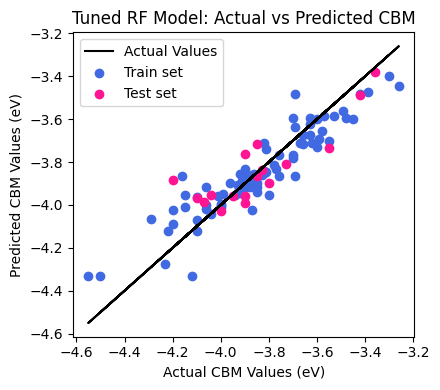

In [ ]:
y_train_pred_n1=best_rf.predict(X_train1)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred_n1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred_n1, color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned RF Model: Actual vs Predicted CBM')
plt.savefig('Tuned RF Model: Actual vs Predicted CBM.png')
plt.tight_layout()
plt.show()

##Tuning for Gradient Boosting

In [ ]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2024-09-12 08:44:42,591] A new study created in memory with name: no-name-f799fc60-c057-4d86-8cff-4118f5a8c391
[I 2024-09-12 08:44:45,533] Trial 0 finished with value: 0.21295893360626406 and parameters: {'n_estimators': 927, 'max_depth': 3, 'learning_rate': 0.2604524047524207, 'subsample': 0.5296612984137472, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.21295893360626406.
[I 2024-09-12 08:44:46,938] Trial 1 finished with value: 0.17671840107540293 and parameters: {'n_estimators': 408, 'max_depth': 10, 'learning_rate': 0.07704555880645206, 'subsample': 0.6116929740970238, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 1 with value: 0.17671840107540293.
[I 2024-09-12 08:44:49,080] Trial 2 finished with value: 0.2011189819752222 and parameters: {'n_estimators': 659, 'max_depth': 8, 'learning_rate': 0.27406958923996594, 'subsample': 0.9944240244481426, 'min_samples_split': 3, 'min_samples_leaf

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)

Best trial: 89
Best hyperparameters:  {'n_estimators': 116, 'max_depth': 3, 'learning_rate': 0.07156501663419723, 'subsample': 0.8407622031994519, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best RMSE:  0.1639300432762143


In [ ]:
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**study2.best_params, random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.1608
Standard Deviation: 0.0317


In [ ]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.7291712722621139
R value: 0.8564857327170606
MAE on Test Set: 0.0858861462117854
MSE on Test Set: 0.01341080135351486
RMSE on Test Set: 0.11580501437120441


In [ ]:
#GBR on Train set
y_train_pred_n2 = best_gbr.predict(X_train2)

y_train_pred_n2=y_train_pred_n2.reshape(len(y_train_pred_n2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train2, y_train_pred_n2))
print("R value:", r_value_p2)
print("MAE on Train Set:", mean_absolute_error(y_train2, y_train_pred_n2))
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred_n2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred_n2)))

R2 on Train Set: 0.8764015311567954
R value: 0.9392131301265115
MAE on Train Set: 0.05789248145196056
MSE on Train Set: 0.006683105970364424
RMSE on Train Set: 0.08175026587335618


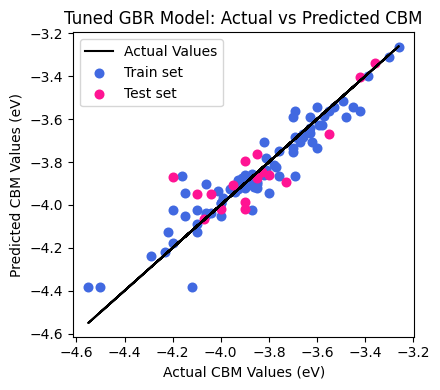

In [ ]:
#Plot
y_train_pred_n2=best_gbr.predict(X_train2)

# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred_n2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned GBR Model: Actual vs Predicted CBM')
plt.savefig('Tuned GBR Model: Actual vs Predicted CBM.png')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Tuning of XGBoost

In [ ]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2024-09-12 08:25:15,251] A new study created in memory with name: no-name-bc21bf79-c412-44bc-a174-0e9f245a9937
[I 2024-09-12 08:25:15,697] Trial 0 finished with value: 0.21357589290945217 and parameters: {'n_estimators': 762, 'max_depth': 4, 'learning_rate': 0.24761999513533642, 'subsample': 0.8102516255020751, 'min_child_weight': 4, 'colsample_bytree': 0.8438146964137414, 'gamma': 0.302840525404526}. Best is trial 0 with value: 0.21357589290945217.
[I 2024-09-12 08:25:16,024] Trial 1 finished with value: 0.19144653617230803 and parameters: {'n_estimators': 375, 'max_depth': 5, 'learning_rate': 0.05892306995965327, 'subsample': 0.5839361245115502, 'min_child_weight': 3, 'colsample_bytree': 0.995194399384767, 'gamma': 0.1046974714045259}. Best is trial 1 with value: 0.19144653617230803.
[I 2024-09-12 08:25:16,229] Trial 2 finished with value: 0.2174292739130157 and parameters: {'n_estimators': 297, 'max_depth': 6, 'learning_rate': 0.13138828665618174, 'subsample': 0.5371547310483101,

In [ ]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 54
Best value (R2): 0.16492949263924078
Best hyperparameters: {'n_estimators': 273, 'max_depth': 6, 'learning_rate': 0.14022858113463355, 'subsample': 0.8808078223725312, 'min_child_weight': 1, 'colsample_bytree': 0.7876579881312811, 'gamma': 0.023938604641592663}


In [ ]:
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**study3.best_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores_n3 = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores_n3 = np.sqrt(-mse_scores_n3)
print("RMSE: {:.4f}".format(rmse_scores_n3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_n3.std()))

RMSE: 0.1601
Standard Deviation: 0.0395


In [ ]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.7480504442134108
R value: 0.8672144804148721
MAE on Test Set: 0.08675507152781771
MSE on Test Set: 0.012475949180067693
RMSE on Test Set: 0.11169578855117006


In [ ]:
#GBR on Train set
y_train_pred_n3 = best_xgb.predict(X_train3)

y_train_pred_n3=y_train_pred_n3.reshape(len(y_train_pred_n3),1)
r_value_p3 = np.corrcoef(y_train4.squeeze(), y_train_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred_n3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred_n3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred_n3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred_n3)))

R2 on Train Set: 0.815971441116926
R value: 0.9094435487475617
MAE on Train Set: 0.07516292090057045
MSE on Train Set: 0.009950627803886843
RMSE on Train Set: 0.09975283356319681


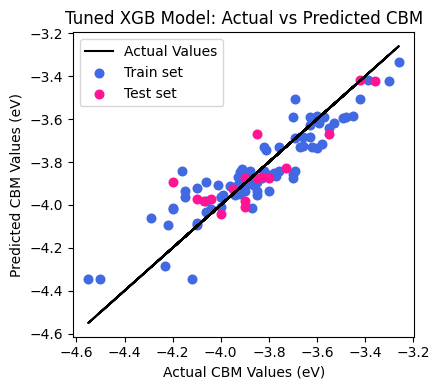

In [ ]:
y_train_pred_n3 = best_xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred_n3, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred_n3, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned XGB Model: Actual vs Predicted CBM')
plt.savefig('Tuned XGB Model: Actual vs Predicted CBM.png')

plt.tight_layout()
plt.show()

##Tuning of CatBoost

In [ ]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2024-09-12 08:26:31,202] A new study created in memory with name: no-name-8e6e1a50-44b0-4830-82b3-894cccc601f4
[I 2024-09-12 08:26:34,742] Trial 0 finished with value: 0.1814231356702407 and parameters: {'iterations': 847, 'depth': 8, 'learning_rate': 0.004125453337589052, 'l2_leaf_reg': 0.11509232264003932, 'bagging_temperature': 0.8703697339891043, 'random_strength': 0.0003228800978713724, 'border_count': 197, 'od_type': 'Iter', 'od_wait': 14}. Best is trial 0 with value: 0.1814231356702407.
[I 2024-09-12 08:26:36,112] Trial 1 finished with value: 0.1842604740535449 and parameters: {'iterations': 484, 'depth': 7, 'learning_rate': 0.0049612891125510065, 'l2_leaf_reg': 0.0001925857482572874, 'bagging_temperature': 0.4718833499502022, 'random_strength': 0.02289043392245277, 'border_count': 181, 'od_type': 'Iter', 'od_wait': 41}. Best is trial 0 with value: 0.1814231356702407.
[I 2024-09-12 08:26:36,997] Trial 2 finished with value: 0.19973366621394706 and parameters: {'iterations': 4

In [ ]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
print("Best RMSE: ", study4.best_value)

Best trial: 71
Best hyperparameters:  {'iterations': 449, 'depth': 4, 'learning_rate': 0.07293958087297592, 'l2_leaf_reg': 5.534816724530967, 'bagging_temperature': 0.5636727163642797, 'random_strength': 1.1048956113657393e-07, 'border_count': 96, 'od_type': 'Iter', 'od_wait': 40}
Best RMSE:  0.16442573353669446


In [ ]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    **study4.best_params,
    random_seed=100
)

best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2236205	total: 287us	remaining: 129ms
1:	learn: 0.2190187	total: 1.16ms	remaining: 260ms
2:	learn: 0.2145164	total: 1.66ms	remaining: 247ms
3:	learn: 0.2107791	total: 2.16ms	remaining: 241ms
4:	learn: 0.2077653	total: 2.63ms	remaining: 234ms
5:	learn: 0.2049013	total: 3.11ms	remaining: 229ms
6:	learn: 0.2016329	total: 3.58ms	remaining: 226ms
7:	learn: 0.1985452	total: 4.02ms	remaining: 222ms
8:	learn: 0.1956285	total: 4.49ms	remaining: 219ms
9:	learn: 0.1930044	total: 4.92ms	remaining: 216ms
10:	learn: 0.1911376	total: 5.38ms	remaining: 214ms
11:	learn: 0.1885687	total: 5.82ms	remaining: 212ms
12:	learn: 0.1868606	total: 6.29ms	remaining: 211ms
13:	learn: 0.1843067	total: 6.74ms	remaining: 209ms
14:	learn: 0.1827372	total: 7.18ms	remaining: 208ms
15:	learn: 0.1805395	total: 7.64ms	remaining: 207ms
16:	learn: 0.1781284	total: 8.09ms	remaining: 206ms
17:	learn: 0.1766906	total: 8.57ms	remaining: 205ms
18:	learn: 0.1753173	total: 9.03ms	remaining: 204ms
19:	learn: 0.1731471	to

In [ ]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.7451760954007898
R value: 0.874801324791168
MAE on Test Set: 0.07962371206711358
MSE on Test Set: 0.012618280170095015
RMSE on Test Set: 0.11233111844050613


In [ ]:
#CB on Train set
y_train_pred_n4 = best_cb.predict(X_train4)

y_train_pred_n4=y_train_pred_n4.reshape(len(y_train_pred_n4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred_n4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred_n4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred_n4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred_n4)))

R2 on Train Set: 0.8759872143996842
R value: 0.9374555746874753
MAE on Train Set: 0.05654347666670323
MSE on Train Set: 0.006705508535857245
RMSE on Train Set: 0.08188716954356919


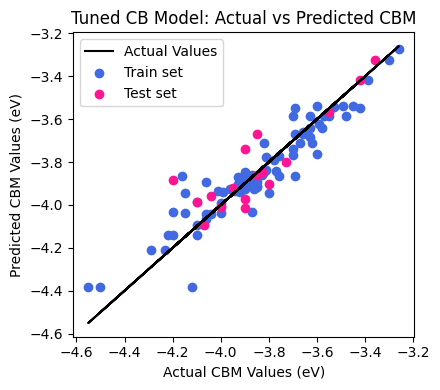

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB Model: Actual vs Predicted CBM')
plt.savefig('Tuned CB Model: Actual vs Predicted CBM.png')


plt.tight_layout()
plt.show()

#SHAP Analysis

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(110, 8)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train2, columns=col)

In [ ]:
explainer=shap.Explainer(gbr)
shap_values=explainer(dfx_test[0:300])

In [ ]:
np.shape(shap_values.values)

(93, 8)

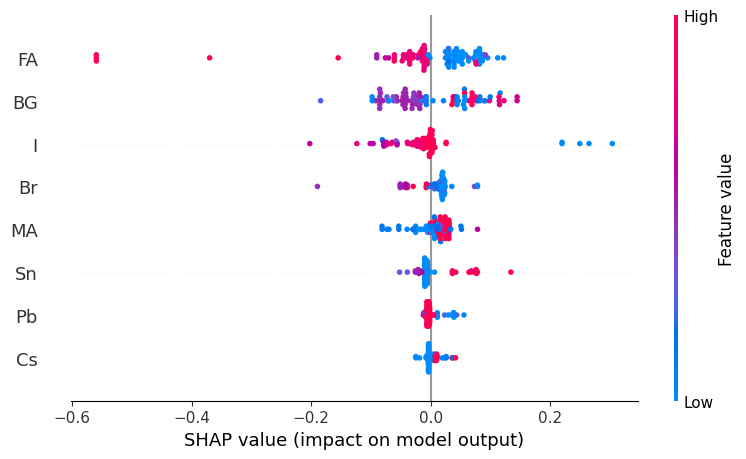

In [ ]:
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values)
plt.show()

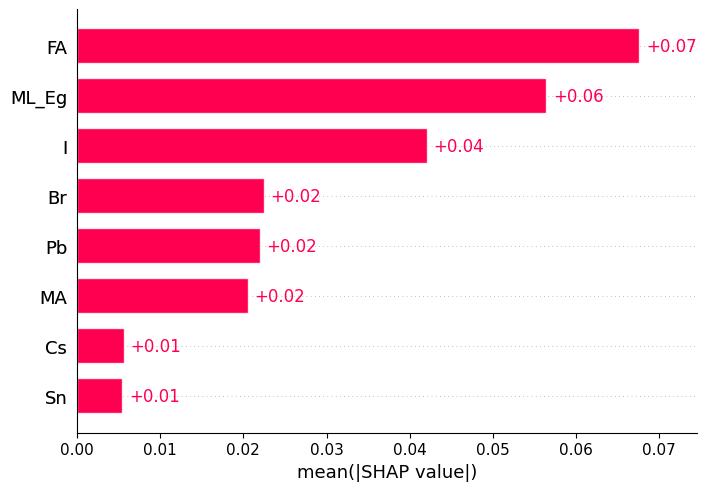

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()